# WEB SCRAPING TO GET ALL THE RESTAURANTS FROM BARCELONA

In [2]:
#Importing libraries

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
from bs4 import BeautifulSoup
import time
from time import sleep
from random import randint
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Function to scrap the data

def parse_html(html):
    data, item = pd.DataFrame(), {}
    soup = BeautifulSoup(html, 'lxml')
    for i, resto in enumerate(soup.find_all('div', class_='location-meta-block')):
        
        name = str(resto.find('div',class_='result-title'))
        item['name'] = BeautifulSoup(name,"lxml").get_text()     
        
        number_reviews = str(resto.find('a',class_='review_count'))
        item['number_reviews'] = BeautifulSoup(number_reviews,"lxml").get_text()
        
        address = str(resto.find('div',class_='address'))
        item['address'] = BeautifulSoup(address,"lxml").get_text()
        
        rating = resto.select('.rating-review-count .ui_bubble_rating')
        item['rating'] = rating[0]['alt']
        data[i] = pd.Series(item)
    return data.T

In [ ]:
#for loop to get the data from each page and save it as a dataframe

restaurants = pd.DataFrame()
driver = webdriver.Chrome()
driver.maximize_window()

for i in range(0,991,30): #991
    url = f'https://www.tripadvisor.es/Search?q=Barcelona&searchSessionId=51C8E5CE54DA772C3953CD9DA7D126D31646914148673ssid&searchNearby=false&sid=6CE36F5C961D4332A3DC16D3040AA0ED1646914152244&blockRedirect=true&ssrc=e&rf=36&o={i}'
    driver.get(url)
    x = randint(2,6)
    sleep(x)
    new_data = parse_html(driver.page_source)
    restaurants = pd.concat([restaurants, new_data], ignore_index=True)
    print(len(restaurants))

driver.close()
restaurants

In [4]:
#Standarise some columns

restaurants['rating']=restaurants['rating'].str.replace(' de 5 burbujas', '')
restaurants['number_reviews']=restaurants['number_reviews'].str.replace(' opiniones', '')

In [5]:
restaurants['rating']=restaurants['rating'].str.replace(',', '.')
restaurants['number_reviews']=restaurants['number_reviews'].str.replace('.', '')
restaurants['rating'] = restaurants['rating'].astype(float)
restaurants['number_reviews'] = restaurants['number_reviews'].astype(int)

In [6]:
restaurants

,name,number_reviews,address,rating
0,Barcelona Tapas Puerto Vallarta,2429,"Calle Matamoros 906, Puerto Vallarta, MéxicoCa...",4.5
1,BelleBuon,2957,"Travessera de Gràcia 441, Barcelona, Cataluña,...",5.0
2,Fàbrica Moritz Barcelona,2887,"Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...",4.0
3,Ciudad Condal,10183,"Rambla de Catalunya, 18, Barcelona, Cataluña, ...",4.5
4,La Peninsular,2875,"Carrer Del Mar, 29, Barcelona, Cataluña, Españ...",4.5
...,...,...,...,...
1015,GOLIARD,320,"Carrer PROGRES, 6, Barcelona, Cataluña, España...",4.5
1016,Locavore Barcelona,126,"Carrer D'aribau, 151, Barcelona, Cataluña, Esp...",5.0
1017,Cal Marius 449 #pastrami,249,"Mallorca, 449, Barcelona, Cataluña, EspañaMall...",4.0
1018,The Box,1085,"Carrer D'en Gignas 30, Barcelona, Cataluña, Es...",4.5


In [7]:
#Remove duplicates (no duplicates)

restaurants = restaurants.drop_duplicates()
restaurants

,name,number_reviews,address,rating
0,Barcelona Tapas Puerto Vallarta,2429,"Calle Matamoros 906, Puerto Vallarta, MéxicoCa...",4.5
1,BelleBuon,2957,"Travessera de Gràcia 441, Barcelona, Cataluña,...",5.0
2,Fàbrica Moritz Barcelona,2887,"Ronda Sant Antoni 41, Barcelona, Cataluña, Esp...",4.0
3,Ciudad Condal,10183,"Rambla de Catalunya, 18, Barcelona, Cataluña, ...",4.5
4,La Peninsular,2875,"Carrer Del Mar, 29, Barcelona, Cataluña, Españ...",4.5
...,...,...,...,...
1015,GOLIARD,320,"Carrer PROGRES, 6, Barcelona, Cataluña, España...",4.5
1016,Locavore Barcelona,126,"Carrer D'aribau, 151, Barcelona, Cataluña, Esp...",5.0
1017,Cal Marius 449 #pastrami,249,"Mallorca, 449, Barcelona, Cataluña, EspañaMall...",4.0
1018,The Box,1085,"Carrer D'en Gignas 30, Barcelona, Cataluña, Es...",4.5


In [8]:
rest=restaurants

In [ ]:
#Checking the address that contains Barcelona to be sure that the restaurants are not in another place. This restaurants now are called rest.

rest=rest[rest['address'].str.contains('Barcelona')]
rest

In [ ]:
#Reseting the index

rest.reset_index(drop=True, inplace=True)
rest

In [11]:
#Defining a function to extract the address without the city, region and state

def extract_street (s):
    return s.split(',')[0]

rest['street']=rest['address'].apply(extract_street)

In [12]:
#Defining a function to extract just the number of the address

def extract_number (s):
    return s.split(',')[1]

rest['number']=rest['address'].apply(extract_number)

In [ ]:
rest

In [14]:
rest['street'] = rest['street'] + rest['number']

In [ ]:
rest

In [16]:
rest['street']=rest['street'].str.replace('Barcelona', '')

In [ ]:
rest

In [ ]:
#Standarise the columns renaming and droping

rest.drop(['number','address'], axis = 1, inplace = True)
rest.rename(columns = {'street':'address'}, inplace = True)
rest['city']='Barcelona'
rest

In [19]:
#Cleaning some special characters, renaming words

rest['address']=rest['address'].str.replace('C/', 'Carrer ')
rest['address']=rest['address'].str.replace('c/', 'Carrer ')
rest['address']=rest['address'].str.replace('Calle', 'Carrer ')
rest['address']=rest['address'].str.replace('calle', 'Carrer ')
rest['address']=rest['address'].str.replace('74b', '74')
rest['address']=rest['address'].str.replace('Carreer','Carrer ')
rest['address']=rest['address'].str.replace('Christina ','Cristina  ')
rest['address']=rest['address'].str.replace('[^\w\s]', ' ')

In [ ]:
rest

In [24]:
#Group address and city to facilitate the geocode

rest['address']=rest['address']+' '+rest['city']

In [25]:
#Importing libraries to geocode

from geopy import Nominatim
from geopy.geocoders import Nominatim
import time

# GEOCODING AND MAPPING THE RESTAURANTS

In [27]:
#Geocoding

geolocator = Nominatim(timeout=10, user_agent="sergiguasch83@gmail.com")

geocode = geolocator.geocode
 
#Applying the method to DataFrame (We decided this method instead of the for loop cause it gets better results)
rest['location'] = rest['address'].apply(geocode)
rest['lat'] = rest['location'].apply(lambda x: x.latitude if x else None)
rest['long'] = rest['location'].apply(lambda x: x.longitude if x else None)

In [31]:
#Displaying all rows from dataframe

pd.set_option('display.max_rows', None)

In [ ]:
rest

In [33]:
#Now we need to drop the location column generated with the geocode to visualize the maps

rest.drop(['location'], axis = 1, inplace = True)

In [51]:
#Saving the dataframe to csv

rest.to_csv('restaurants.csv',encoding='utf-8-sig')

In [2]:
#Load all importance packages to visualize the maps
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
#To read the csv if its necessary

rest=pd.read_csv('restaurants.csv')

In [4]:
#Creating a Geodataframe

gdf = geopandas.GeoDataFrame(rest, geometry=geopandas.points_from_xy(rest['long'], rest['lat']))

In [5]:
gdf

,Unnamed: 0,name,number_reviews,rating,address,city,lat,long,geometry
0,0,BelleBuon,2957,5.0,Travessera de Gràcia 441 Barcelona,Barcelona,41.411243,2.172947,POINT (2.17295 41.41124)
1,1,Fàbrica Moritz Barcelona,2887,4.0,Ronda Sant Antoni 41 Barcelona,Barcelona,41.382567,2.163397,POINT (2.16340 41.38257)
2,2,Ciudad Condal,10183,4.5,Rambla de Catalunya 18 Barcelona,Barcelona,41.388800,2.166890,POINT (2.16689 41.38880)
3,3,La Peninsular,2875,4.5,Carrer Del Mar 29 Barcelona,Barcelona,41.380359,2.187872,POINT (2.18787 41.38036)
4,4,La Patsa Lab,1758,5.0,Carrer Casanova 94 Barcelona,Barcelona,41.386981,2.156921,POINT (2.15692 41.38698)
...,...,...,...,...,...,...,...,...,...
984,984,GOLIARD,320,4.5,Carrer PROGRES 6 Barcelona,Barcelona,42.016281,2.241467,POINT (2.24147 42.01628)
985,985,Locavore Barcelona,126,5.0,Carrer D aribau 151 Barcelona,Barcelona,41.392563,2.153457,POINT (2.15346 41.39256)
986,986,Cal Marius 449 #pastrami,249,4.0,Mallorca 449 Barcelona,Barcelona,41.405881,2.178473,POINT (2.17847 41.40588)
987,987,The Box,1085,4.5,Carrer D en Gignas 30 Barcelona,Barcelona,41.381411,2.180312,POINT (2.18031 41.38141)


In [6]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [7]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

In [8]:
type(gdf.geometry[0])

shapely.geometry.point.Point

<AxesSubplot:>

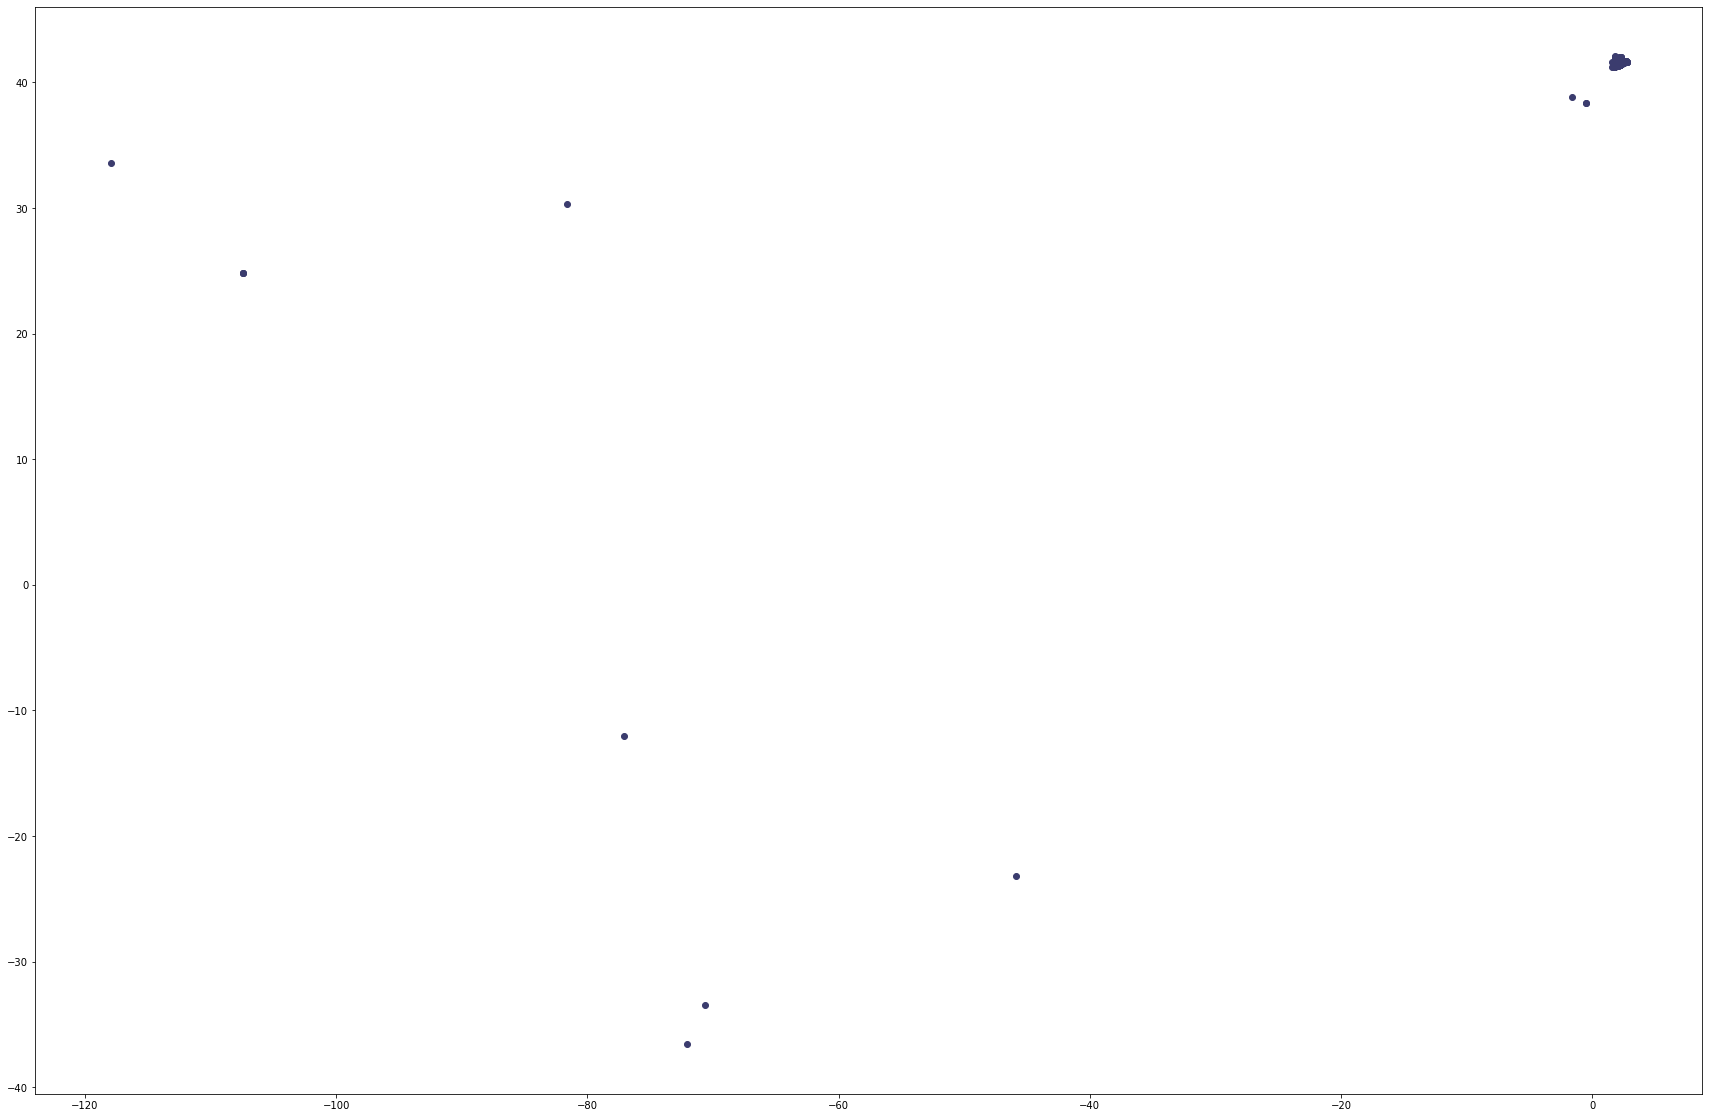

In [9]:
#Checking some plots in order to see if its possible to visualize data 

gdf.plot(figsize=(30,20), color='#3B3C6E')

In [10]:
#Loading more libraries to set a coordinate system

import os
import folium

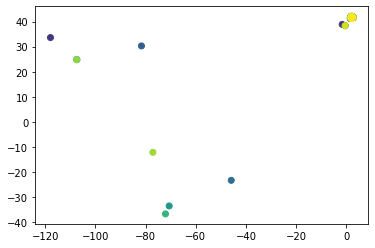

In [11]:
#Setting the coordinate system

gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(epsg='4326')
ax = gdf.plot(cmap="viridis")

In [12]:
#Plot map
barcelona_map = folium.Map([41.3947,2.1557], zoom_start=12.4, tiles='cartodbpositron')
folium.GeoJson(gdf).add_to(barcelona_map)
barcelona_map

In [13]:
#Plot another map to visualize the streets (scroll to zoom)

barcelona_map = folium.Map([41.3947,2.1557], zoom_start=12.4, tiles='OpenStreetMap')
folium.GeoJson(gdf).add_to(barcelona_map)
barcelona_map

In [ ]:
#We check the restaurant with the most number of reviews. We do this step as well in Tableau.

rest.sort_values(by='number_reviews', ascending=False)

In [15]:
#Checking the null values are not geocodeed

rest_nulls = rest[rest.isna().any(axis=1)]

In [16]:
rest_nulls['lat'].isna().sum()

95

In [17]:
#We save the null values for the future if needed

rest_nulls.to_csv('nulls.csv',encoding='utf-8-sig')

In [ ]:
#Finally we decided to drop all null values

rest2=rest
pd.set_option('display.max_rows', None)
rest2.dropna(inplace=True)
rest2

In [19]:
#We checked there are not more null values 

rest2['lat'].isna().sum()

0